# Seminar 2: Linear Regression
Course: MA06018, Machine Learning by professor Evgeny Burnaev <br\>
Author: Evgenii Egorov

In [1]:
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

### Table of containts:
* [Dataset manipulation](#df) 
* Simple Linear Regression, $L_2$ ("ridge") Regularization [Exercise 1](#ols_1)
* $L_1$ Regulariztion ("lasso") [Exercise 1](#ols_2)
* Total Variation Regularization ("fused lasso")
    [Exercise 1](#tv_1)
    [Exercise 2](#tv_2)
    [Exercise 3](#tv_3)
    [Exercise 4](#tv_4)
    [Exercise 5](#tv_5)

<a id='df'></a>
### Dataset "Melbourne Housing Snapshot"

In [3]:
data = pd.read_csv('data/melburn_data.csv', index_col='Unnamed: 0')

In [4]:
[print(col, data[col].isnull().sum(), data[col].mode()[0]) for col in data.columns];

Suburb 0 Reservoir
Address 0 1/1 Clarendon St
Rooms 0 3
Type 0 h
Price 0 600000.0
Method 0 S
SellerG 0 Nelson
Date 0 27/05/2017
Distance 1 11.2
Postcode 1 3073.0
Bedroom2 3469 3.0
Bathroom 3471 1.0
Car 3576 2.0
Landsize 4793 0.0
BuildingArea 10634 120.0
YearBuilt 9438 1970.0
CouncilArea 6163 Moreland
Lattitude 3332 -37.8361
Longtitude 3332 144.9966
Regionname 1 Southern Metropolitan
Propertycount 1 21650.0


In [5]:
data.drop(data.index[data.isnull().sum(axis=1) > 0], axis=0, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6196 entries, 2 to 19739
Data columns (total 21 columns):
Suburb           6196 non-null object
Address          6196 non-null object
Rooms            6196 non-null int64
Type             6196 non-null object
Price            6196 non-null float64
Method           6196 non-null object
SellerG          6196 non-null object
Date             6196 non-null object
Distance         6196 non-null float64
Postcode         6196 non-null float64
Bedroom2         6196 non-null float64
Bathroom         6196 non-null float64
Car              6196 non-null float64
Landsize         6196 non-null float64
BuildingArea     6196 non-null float64
YearBuilt        6196 non-null float64
CouncilArea      6196 non-null object
Lattitude        6196 non-null float64
Longtitude       6196 non-null float64
Regionname       6196 non-null object
Propertycount    6196 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 1.0+ MB


In [7]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


In [8]:
X_names = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car',  'Lattitude', 'Longtitude', 'Propertycount']
y_name = ['Price']

X = data[X_names]
y = data[y_name]

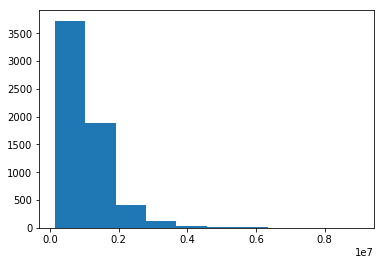

In [9]:
plt.hist(y.values);

In [10]:
y = y / np.max(y)

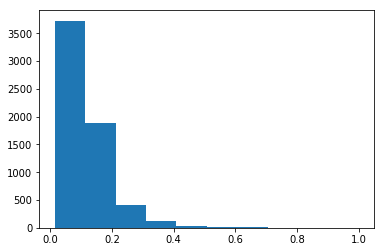

In [11]:
plt.hist(y.values);

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=1010)

### Simple Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression as LR

Please visti http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html and find out method of solving, that LinearRegression use

In [15]:
ols = LR(fit_intercept=True, normalize=False)
ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
def RegressionModelScores(model, true_values, predictions, give_coeff=False):
    print("Sqrt of mean squared error: %.4f"
          % mean_squared_error(true_values, predictions) ** 0.5)
    print("Mean absolute error: %.4f"
          % mean_absolute_error(true_values, predictions))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.4f' % r2_score(true_values, predictions))
    plt.hist(model.coef_);
    if give_coeff:
        return model.coef_

Sqrt of mean squared error: 0.0479
Mean absolute error: 0.0339
Variance score: 0.5529


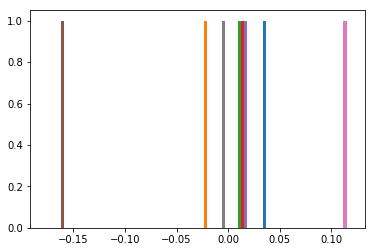

In [17]:
predictions = ols.predict(X_test)
RegressionModelScores(ols, y_test, predictions)

<a id='ols_1'></a>
*** LR Exercise 1 ***

$$
\hat{y} = X(X^TX)^{-1}X^Ty = Hy 
$$

And $h_{ii} = \sum_{j}h_{ij}^2$. Hence $h_{ii}$ is measue influence of $i$-th data point to result prediction. Sometimes deleting leveraged points help. Try on this dataset, but be carefull.

** Solution **

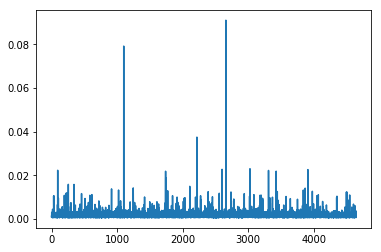

In [18]:
H = X_train.values @ np.linalg.inv(X_train.values.T @ X_train.values) @ X_train.values.T 
h = np.diagonal(H)
plt.plot(h);

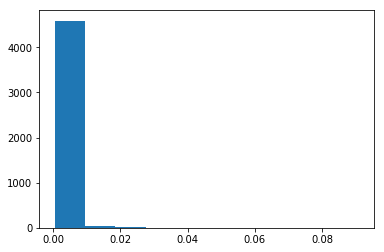

In [19]:
plt.hist(h);

In [20]:
X_train_no_lv = X_train[h < 0.04]
y_train_no_lv = y_train[h < 0.04]

In [21]:
ols_no_lv = LR(fit_intercept=True, normalize=False)
ols_no_lv.fit(X_train_no_lv, y_train_no_lv)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Sqrt of mean squared error: 0.0478
Mean absolute error: 0.0339
Variance score: 0.5536


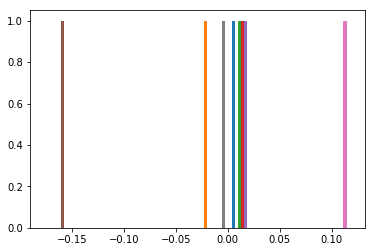

In [22]:
predictions_no_lvl = ols_no_lv.predict(X_test)
RegressionModelScores(ols_no_lv, y_test, predictions_no_lvl)

We get some improvment!

However, score is so smole. Let's start with adding polynomial features and $l_2$ regularization as they are potentially corrilated. To tune its hyperparametr, we will use crossvalidation grid search

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
polynomial_transformer = PolynomialFeatures(degree=2)
X_poly = polynomial_transformer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.25, shuffle=True, random_state=1010)

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [26]:
ridge_ols = Ridge(fit_intercept=True, random_state=1010, tol=1e-4, solver='auto')
alpha_linspace = np.linspace(0.0001,3,10)
parameters = {'alpha':alpha_linspace}
gridsearch_ridge = GridSearchCV(ridge_ols, parameters, cv=5, verbose=0, scoring='r2')

In [27]:
gridsearch_ridge.fit(X_train, y_train.values.flatten())

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=1010, solver='auto', tol=0.0001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-04,   3.33422e-01,   6.66744e-01,   1.00007e+00,
         1.33339e+00,   1.66671e+00,   2.00003e+00,   2.33336e+00,
         2.66668e+00,   3.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

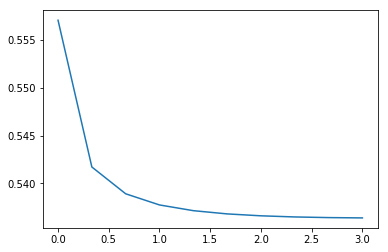

In [28]:
plt.plot(alpha_linspace, gridsearch_ridge.cv_results_['mean_test_score']);

In [29]:
best_ridge = gridsearch_ridge.best_estimator_

In [30]:
best_ridge

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=1010, solver='auto', tol=0.0001)

Sqrt of mean squared error: 0.0421
Mean absolute error: 0.0301
Variance score: 0.6545


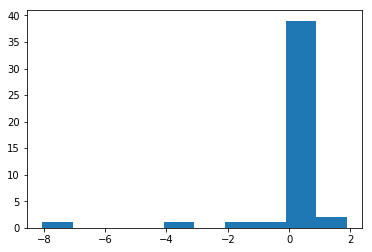

In [31]:
predictions = best_ridge.predict(X_test)
RegressionModelScores(best_ridge, y_test, predictions)

### $L_1$ Regularization ("Lasso")
*** Lasso Exercise 1 ***

Make the same analysis with sklearn.linear_model.LassoLars

<a id='ols_2'></a>

*** Solution ***

In [32]:
from sklearn.linear_model import LassoLars as Lasso

In [33]:
lasso_ols = Lasso(fit_intercept=True, normalize=False)
alpha_linspace = np.linspace(1e-6,1,5)
parameters = {'alpha':alpha_linspace}
gridsearch_lasso = GridSearchCV(lasso_ols, parameters, cv=5, verbose=2, scoring='r2')

In [34]:
gridsearch_lasso.fit(X_train, y_train.values.flatten())

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] alpha=1e-06 .....................................................
[CV] ...................................... alpha=1e-06, total=   0.0s
[CV] alpha=1e-06 .....................................................
[CV] ...................................... alpha=1e-06, total=   0.0s
[CV] alpha=1e-06 .....................................................
[CV] ...................................... alpha=1e-06, total=   0.0s
[CV] alpha=1e-06 .....................................................
[CV] ...................................... alpha=1e-06, total=   0.0s
[CV] alpha=1e-06 .....................................................
[CV] ...................................... alpha=1e-06, total=   0.0s
[CV] alpha=0.25000075 ................................................
[CV] ................................. alpha=0.25000075, total=   0.0s
[CV] alpha=0.25000075 ................................................
[CV] ............

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LassoLars(alpha=1.0, copy_X=True, eps=2.2204460492503131e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=False,
     positive=False, precompute='auto', verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-06,   2.50001e-01,   5.00000e-01,   7.50000e-01,
         1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=2)

In [35]:
gridsearch_lasso.cv_results_['mean_test_score']

array([ 0.55662591,  0.4680516 ,  0.42137176,  0.40456852,  0.3832551 ])

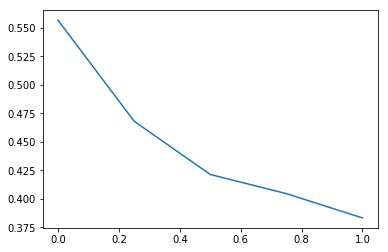

In [36]:
plt.plot(alpha_linspace, gridsearch_lasso.cv_results_['mean_test_score']);

In [37]:
best_lasso = gridsearch_lasso.best_estimator_

In [38]:
best_lasso

LassoLars(alpha=9.9999999999999995e-07, copy_X=True,
     eps=2.2204460492503131e-16, fit_intercept=True, fit_path=True,
     max_iter=500, normalize=False, positive=False, precompute='auto',
     verbose=False)

Sqrt of mean squared error: 0.0422
Mean absolute error: 0.0302
Variance score: 0.6522


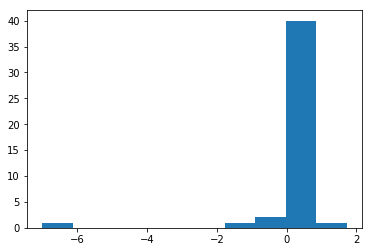

In [39]:
predictions = best_lasso.predict(X_test)
RegressionModelScores(best_lasso, y_test, predictions)

### Total Variation Regularization ("Fused Lasso")

Consider we observing $1D$ measurments of the system status from the sensor at the eqvistidance time momets. However, measurments are noisy (autonomous robot in harsh conditions on Mars or some not well-defined sensors on the exgauster of mining company).

Hence, our model:

$$
\begin{aligned}
& n = 0,\dots, N \\
& y(n) := \text{Observation at the moment $n$} \\
& x(n) := \text{Real value of a measurment at the moment $n$} \\
& w(n) := \text{Some noize value at the moment $n$, not observable} \\
& \text{Model: } y(n) = x(n) + w(n)
\end{aligned}
$$




As we want to recover true signal from noise observations, we obtain the regression problem. More over, consider our system changes over time between states, but inside state it changes slow. Than natural regularization is **total variation**. Unlike $\mathcal{l_2}$ based reconstruction, total variation regularization filters high frequency noise out while preserving sharp jumps. 

$$
\begin{aligned}
& x \in \mathbb{R}^N \\
& TV(x) = \sum\limits_{n=1}^{N-1}|x(n) - x(n-1)| 
\end{aligned}
$$

And our problem can be state as:

$$
\begin{aligned}
& \arg\min\limits_x \left\{\frac{1}{2}\left(y(n)-x(n)\right)^2 + \lambda\sum\limits_{n=1}^{N-1}\left|x(n) - x(n-1)\right|\right\} \\
& \lambda > 0, \text{ smooting parameter }
\end{aligned}
$$

For simplicity, we can rewrite our problem in matrix-vector form:

$$
\begin{aligned}
& \arg\min\limits_x \left\{\frac{1}{2}\|y - x\|^2_2 + \lambda\|Dx\|_1\right\} \\
& y, x\in\mathbb{R}^N \\
& D = \begin{pmatrix}
-1 & 1  &   &   &  \\ 
  & -1  & 1  &  & \\\ 
  &  & \ddots  & \ddots \\ 
  &  &   & -1 & 1\\
\end{pmatrix} \in\mathbb{R}^{(N-1)\times N}
\end{aligned}
$$

From observation $\|Dx\|_1 = \max\limits_{u,\|u\|\leq 1}\langle u, Dx\rangle$ clear that problem is convex. However it is not smooth. And in constrast with $\mathcal{l}_1$ it is not coordinate-wise separable.

Than we can consider **MM algorithm**

$$
\begin{aligned}
F(x) \text{:= original function for optimization} \\
\textbf{MM Algorithm} \\
& 0.~k = 0, \text{Initialize }x_0 \\
& 1.~\text{Choose $G_k$ such that:} \\
& \text{ (a) }G_k(x)\geq F(x)~\forall x \in \text{dom } F \\
& \text{ (b) }G_k(x_k) = F(x_k) \\
& 2.~x_{k+1} = \arg\min\limits_{x}G_k(x) \\
& 3.~k=k+1, \text{ return to step 2, untill stopping criteria }
\end{aligned}
$$

*** Solution Derivation ***

One can observe:

$$
\begin{aligned}
& g(t) = \frac{1}{2|t_k|}t^2 + \frac{1}{2}|t_k| \geq |t| = f(t) \\
& g(t_k) = |t_k| = f(t_k)
\end{aligned}
$$

Hence, we can majorize our problem. $v\in\mathbb{R}^{N-1}$ For each $v(n)$ we can use inequality above. Summing them up:

$$
\begin{aligned}
& \sum\limits_{n} \frac{1}{2|v_k(n)|}v(n)^2 + \frac{1}{2}|v_k(n)| \sum\limits_{n} \geq |v(n)| \\
& \text{In matrix-vector form:} \\
& \frac{1}{2}v^T\Lambda_k^{-1}v + \frac{1}{2}\|v_k\|_1 \geq \|v\|_1, \text{ where } \Lambda = \text{diag}(|v_k|) \\
& \text{Subsitute } v = Dx: \\
& \frac{1}{2}x^TD^T\Lambda_k^{-1}Dx + \frac{1}{2}\|Dx_k\|_1 \geq \|Dx\|_1, \text{ where } \Lambda = \text{diag}(|Dx_k|) \\
\end{aligned}
$$

Finally adding postive reconstruction error and times $\lambda$, $\lambda > 0$:

$$
G_k(x) = \frac{1}{2}\|y-x\|_2^2 + \frac{\lambda}{2}x^TD^T\Lambda_k^{-1}Dx + \frac{\lambda}{2}\|Dx_k\|_1
$$

Please note that $G_k(x)$ is convex on x and smooth. So by first order conditions we can find explicit solution

<a id='tv_1'></a>
*** TV Exercise 1 ***

Find derivative on $x$

$$
\frac{\partial}{\partial x}G_k(x) = \frac{\partial}{\partial x} \left[\frac{1}{2}\|y-x\|_2^2 + \frac{\lambda}{2}x^TD^T\Lambda_k^{-1}Dx + \frac{\lambda}{2}\|Dx_k\|_1\right] = \dots
$$

** Solution **

$$
\frac{\partial}{\partial x}G_k(x) = -y + x + \lambda D^T\Lambda_k^{-1}Dx
$$

<a id='tv_2'></a>
*** TV Exercise 2 ***

Find optimal $x$ from $\frac{\partial}{\partial x}G_k(x) = 0$

** Solution **

$$
\begin{aligned}
& -y + x + \lambda D^T\Lambda_kDx = 0 \\
& y = (I + \lambda D^T\Lambda_k^{-1}D)x \\
& x = (I + \lambda D^T\Lambda_k^{-1}D)^{-1}y
\end{aligned}
$$

<a id='tv_3'></a>
*** TV Exercise 3 ***

Recall defenition of $\Lambda_k$:

$$
\Lambda_k = \text{diag}{|Dx_k|}
$$

Hence, $\Lambda_k^{-1}$ will have very huge numbers, if $x_k$ has small variation. Therefore, we should avoid inversion of it by using matrix lemma. 

Using 

$$
(A+BCD)^{-1} = A^{-1}-A^{-1}B(C^{-1}+DA^{-1}B)^{-1}DA^{-1}
$$

Rewrite optimal $x$

** Solution **

$$
\begin{aligned}
& (A+BCD)^{-1} = A^{-1}-A^{-1}B(C^{-1}+DA^{-1}B)^{-1}DA^{-1} \\
& (I + \lambda D^T\Lambda_k^{-1}D)^{-1} = I - \lambda D^T(\Lambda_k+\lambda DD^T)^{-1}D = I -  D^T(\frac{1}{\lambda}\Lambda_k+DD^T)^{-1}D
\end{aligned}
$$

Finally, we get:
    
$$
x_{k+1} = y - D^T(\frac{1}{\lambda}\text{diag}(|Dx_k|)+DD^T)^{-1}Dy
$$

<a id='tv_4'></a>
*** TV Exercise 4 ***

Implement MM algorithm. Note that

$$
DD^T = \begin{pmatrix}
2 & -1  &   &   &  \\ 
-1  & 2  & -1  &  & \\\ 
  &  & \ddots  & \ddots \\ 
  &  &   & -1 & 2 & -1 \\
  &  &   &  & -1 & 2
\end{pmatrix}
$$

Hence matrix $(\frac{1}{\lambda}\Lambda_k+DD^T)$ is tridiagonal and we can store it in the sparse format.

In [ ]:
# !conda install tqdm -y

In [40]:
from scipy.sparse import diags
from tqdm import tqdm

In [41]:
def tv_denoise(y, x_0, C, max_iter):
    N = y.shape[0]
    
    # D matrix
    d_main_diag = [-1] * (N-1)
    d_up_diag = [1] * (N)
    D = diags([d_main_diag, d_up_diag], [0, 1], shape=(N-1,N))
    
    # Same way construct DD^T matrix
    dd_t_main_diag = [2] * (N-1)
    dd_t_up_diag = [-1] * (N-2)
    dd_t_down_diag = [-1] * (N-2)
    DD_T = diags([dd_t_main_diag, dd_t_up_diag, dd_t_down_diag], [0, 1, -1], shape=(N-1, N-1))
    
    x_k = x_0.copy()
    for k in tqdm(range(max_iter)):
        D_x_k = np.abs(D @ x_k)
        Lambda_k = diags([D_x_k], [0], shape=(N-1, N-1))
        smooth_matrix_k = Lambda_k / C + DD_T
        
        inv_smooth_matrix_k = np.linalg.pinv(smooth_matrix_k.todense()) # can be optimized by Thomas algorithm
        x_k_vec = y - D.T @ inv_smooth_matrix_k @ D @ y
        x_k = np.squeeze(np.asarray(x_k_vec))
    
    return x_k

*** Example Generation *** 

In [42]:
y = np.vectorize(lambda x: - 0.5 * x ** 2)

In [43]:
basic_motion = y(np.linspace(-1, 0, 250))
series = np.hstack((basic_motion, basic_motion - 1., basic_motion + 1.5))

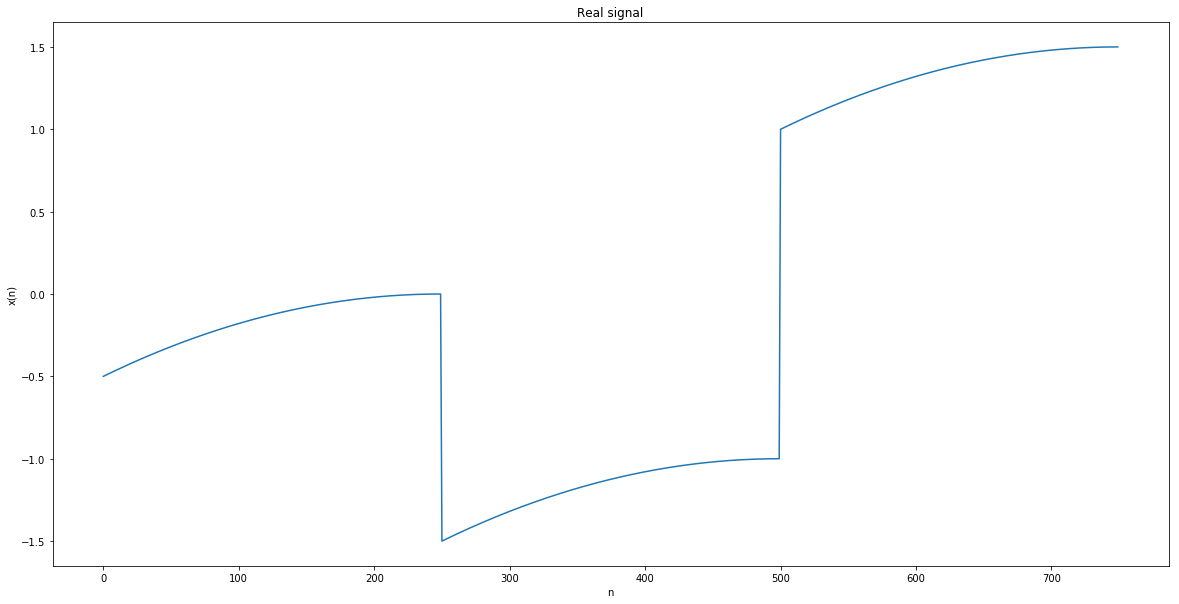

In [44]:
plt.figure(figsize=(20, 10))
plt.plot(series);
plt.xlabel('n');
plt.ylabel('x(n)');
plt.title('Real signal');

In [45]:
np.random.seed(101)
series_noised = series +  0.05 * np.random.randn(series.shape[0])

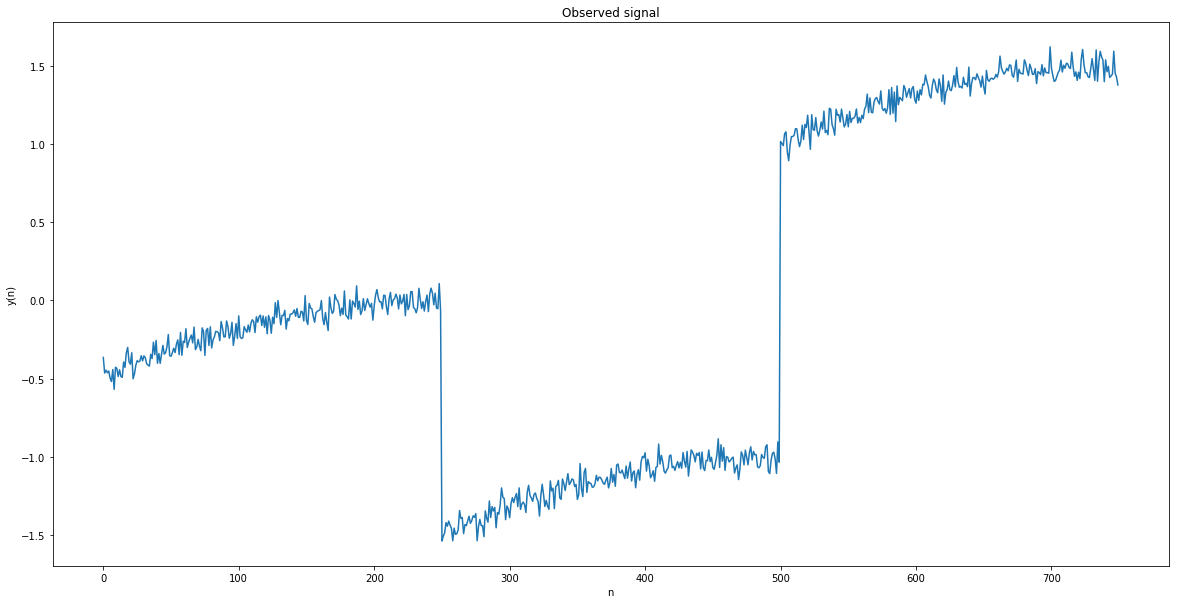

In [46]:
plt.figure(figsize=(20, 10))
plt.plot(series_noised);
plt.xlabel('n');
plt.ylabel('y(n)');
plt.title('Observed signal');

In [47]:
initial_guess = np.array([series_noised.mean()] * series_noised.shape[0])
series_denoised = tv_denoise(series_noised, initial_guess, 1, 100)

100%|██████████| 100/100 [00:15<00:00,  6.30it/s]


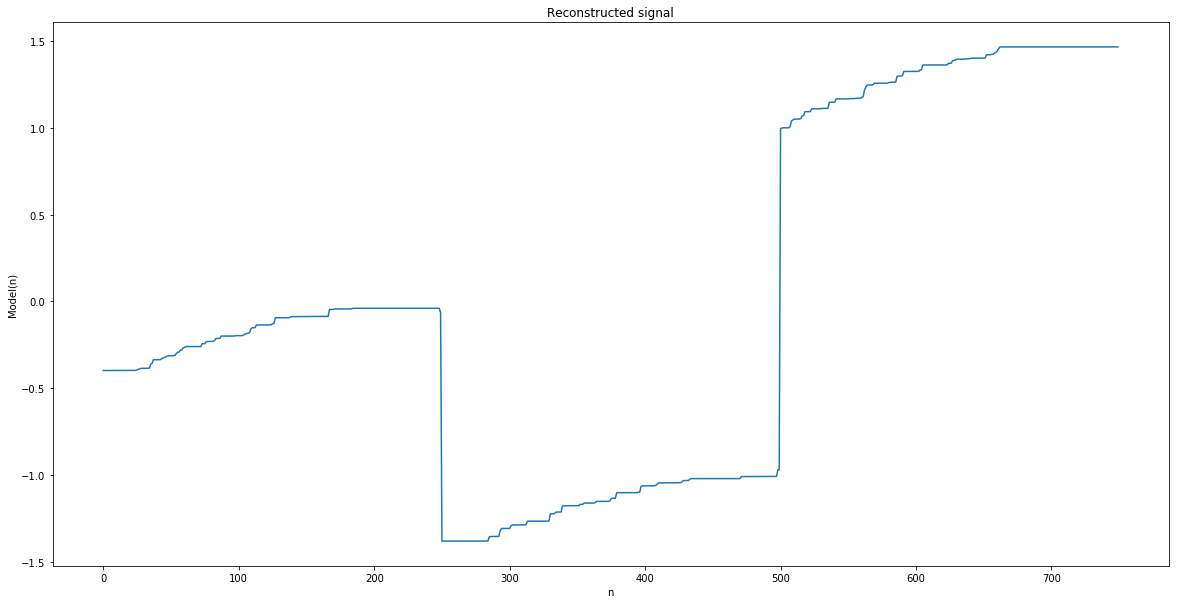

In [48]:
plt.figure(figsize=(20, 10))
plt.plot(series_denoised);
plt.xlabel('n');
plt.ylabel('Model(n)');
plt.title('Reconstructed signal');

<a id='tv_5'></a>
*** TV Exercise 5 ***

Play around with different $\lambda$ parametr and number of iterations. Modify function with stopping criteria.